## Data Collection  

Our data collection method consisted of manually taking LinkedIn job posting url's and running them through the web scrapper in order to collect the salary, benefits, languages, education, and machine learning requirements from each job posting. We believed a sufficient sample size consisted of two-hundred LinkedIn ads in total split between one-hundred data analyst ads and one-hundred data scientist ads. By having equal amounts of data analysts and scientists ads, we can properly compare the differences between the two roles and highlight meaningful differences in terms of salary and education requirements, all to emphasize the expectations for new college graduates considering applying to these positions in industry. 

After compiling all two-hundred urls between the two roles, we collected the features of interest as stated before, using the web scrapper function "collect_data." Many of these postings however omitted various aspects of the role, such as salary,years of experience, or preferred degree, which we remedied by taking the average salary of each role from the subset of ads with salaries listed, creating an "Unspecified" label for ads with no education level mentioned, and years of experience as zero for ads with no experience mentioned. With these problems alleviated, we created pandas dataframes from the csv files of the exported data and concatenated the two separate roles into one dataframe in order to create visualizations and perform other statistical analyses in our comparison.

In [2]:
#pairs plots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

In [3]:
#read in the csv's
df_analyst=pd.read_csv('data_analyst.csv')
df_scientist = pd.read_csv('data_scientist.csv')
#strips dollar sign/ cleans the salary column
def f(x):
    x= x.strip("$")
    x= x.replace(',','')
    return x
df_scientist.loc[~df_scientist["Salary"].isna(),"Salary"]=df_scientist.loc[~df_scientist['Salary'].isna(),'Salary'].map(f)
df_scientist['Salary']= df_scientist['Salary'].astype(float)
len(df_analyst)

100

In [4]:
#combine the two pd dataframes
df = pd.concat([df_analyst.reset_index(drop=True), df_scientist.reset_index(drop=True)], axis=0,ignore_index=True)
df_plot=df #just in case to compare with original combined df
del df_plot[df_plot.columns[0]] #delete index column

df = df.drop_duplicates()
df_plot=df #just in case to compare with original combined df

len(df_plot)


198

In [5]:
#Only for the salary pairs
df_na = df.loc[df['Salary'] != 96955.0]
df_na = df_na.loc[df_na['Salary'] != 144500.0]
df_na.to_csv('with_category.csv')
df_na.head() #unfactorized categories dataset 

#for everything that isn't salary use df_plot
df_na.to_csv('with_category.csv')
len(df_na)

32

Text(0.5, 0.98, 'Seaborn Pairs')

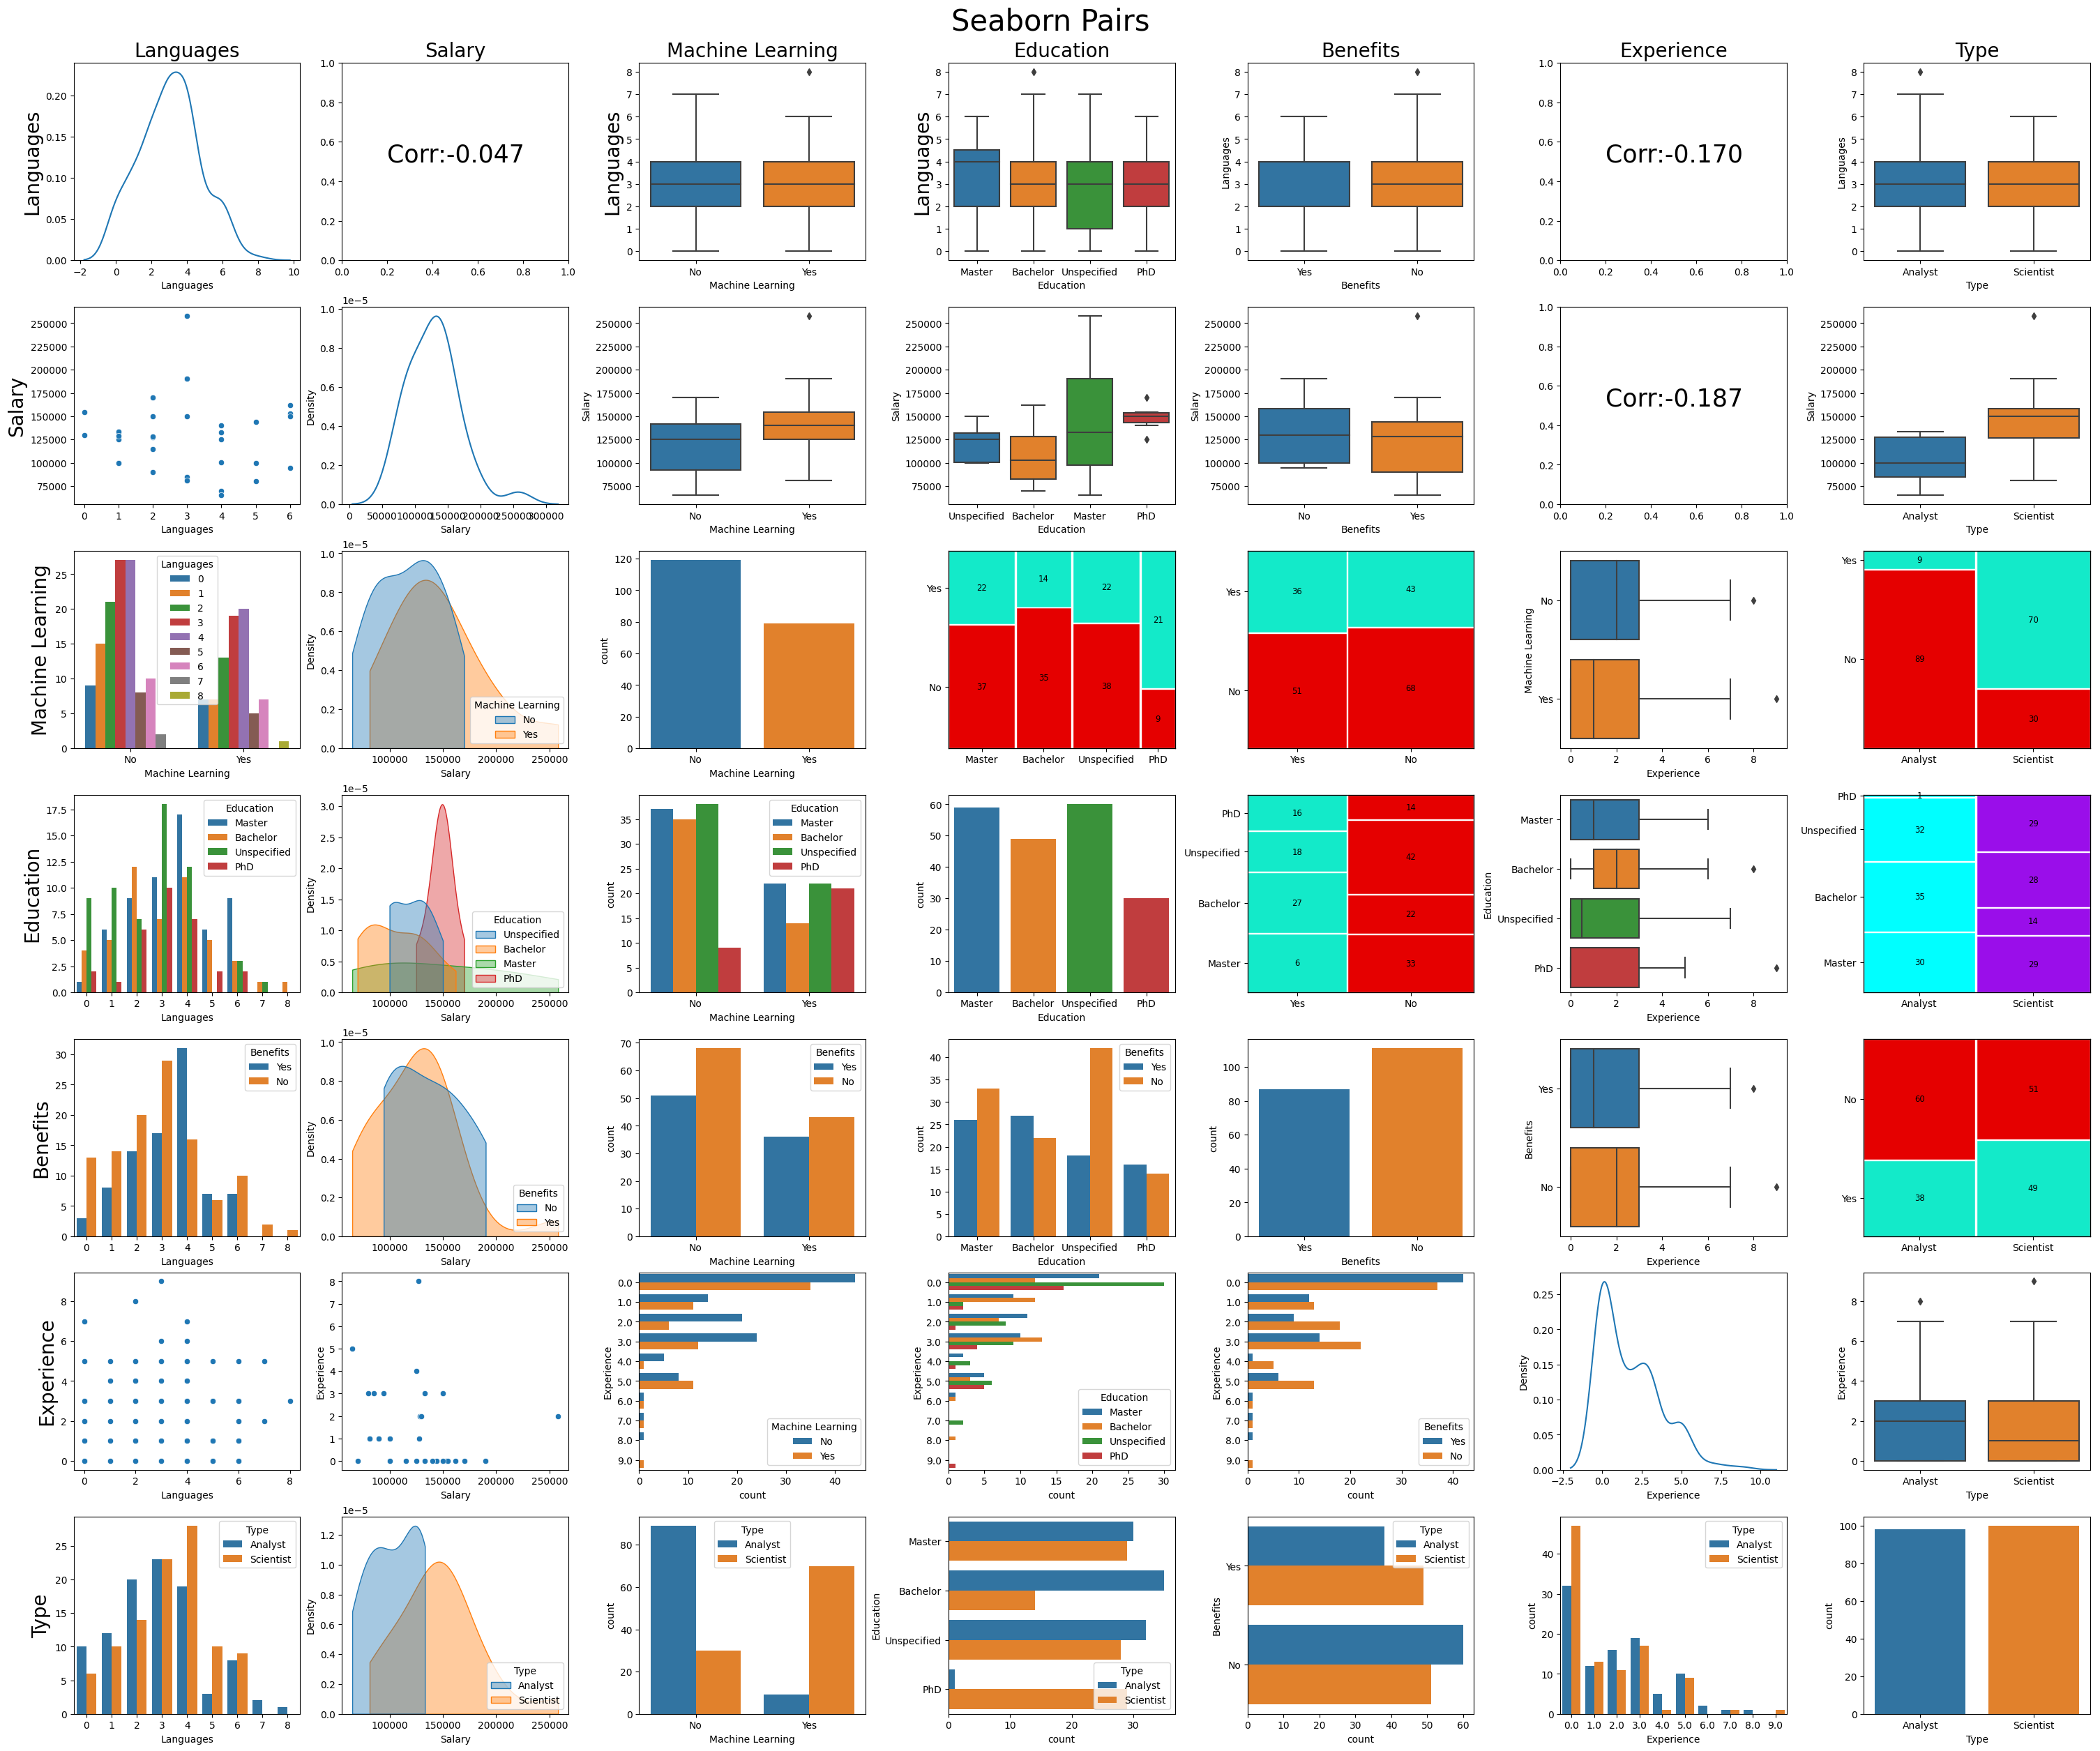

In [37]:
#figure, axes and axis
fig, axes = plt.subplots(nrows=7, ncols = 7,figsize=(30, 25), layout = 'constrained')

#Language on itself
sns.kdeplot(df_plot, x="Languages",ax=axes[0][0])
ax=axes[0][0].set_title('Languages', fontsize = 20)
ax=axes[0][0].set_ylabel('Languages',fontsize = 20)

#Lang-Salary coef
sal_corr=df_na['Languages'].corr(df_na['Salary'])
ax=axes[0][1].text(0.2, 0.5,'Corr:-0.047', fontsize=25)
ax=axes[0][1].set_title('Salary',fontsize = 20)


#Language-Machine Learning (box)
sns.boxplot(data=df_plot, x="Machine Learning",y="Languages",ax=axes[0][2])
ax=axes[0][2].set_xlabel('Machine Learning')
ax=axes[0][2].set_ylabel('Languages',fontsize = 20)
ax=axes[0][2].set_title('Machine Learning',fontsize = 20)

#Language-Education (box)
sns.boxplot(data=df_plot, x="Education",y="Languages",ax=axes[0][3])
ax=axes[0][3].set_xlabel('Education')
ax=axes[0][3].set_ylabel('Languages',fontsize = 20)
ax=axes[0][3].set_title('Education',fontsize = 20)

#Language-Benefits (box)
sns.boxplot(data=df_plot, x="Benefits",y="Languages",ax=axes[0][4])


ax=axes[0][4].set_title('Benefits',fontsize = 20)

#Language-Experience (correlation coef)
ax=axes[0][5].text(0.2, 0.5,'Corr:-0.170', fontsize=25)


ax=axes[0][5].set_title('Experience',fontsize = 20)

#Language-Type (box)
sns.boxplot(data=df_plot, x="Type",y="Languages",ax=axes[0][6])
ax=axes[0][6].set_xlabel('Type')

ax=axes[0][6].set_title('Type',fontsize = 20)

#Columns
#Language-Salary(scatterplot)
sns.scatterplot(df_na, x="Languages", y="Salary",ax=axes[1][0])
ax=axes[1][0].set_xlabel('Languages')
ax=axes[1][0].set_ylabel('Salary',fontsize = 20)

#Language-Machine Learning (bar)
sns.countplot(data=df_plot, x="Machine Learning",hue="Languages",ax=axes[2][0])

ax=axes[2][0].set_ylabel('Machine Learning',fontsize = 20)

#Language-Education (bar)
sns.countplot(data=df_plot, x="Languages",hue="Education",ax=axes[3][0])
ax=axes[3][0].set_ylabel('Education',fontsize = 20)

#Language-Benefits (bar)
sns.countplot(data=df_plot, x="Languages",hue="Benefits",ax=axes[4][0])
ax=axes[4][0].set_ylabel('Benefits',fontsize = 20)

#Language-Experience (scatterplot)
sns.scatterplot(df_plot, x="Languages", y="Experience",ax=axes[5][0])
ax=axes[5][0].set_ylabel('Experience',fontsize = 20)

#Language-Type (bar)
sns.countplot(data=df_plot, x="Languages",hue="Type",ax=axes[6][0])

ax=axes[6][0].set_ylabel('Type',fontsize = 20)

##Salary
#rows
##Salary itself
sns.kdeplot(df_na, x="Salary",ax=axes[1][1])
##Salary-Machine Learning (box)
sns.boxplot(data=df_na, x="Machine Learning",y="Salary" ,ax=axes[1][2])
##Salary-Education (box)
sns.boxplot(data=df_na, x="Education",y="Salary",ax=axes[1][3])
##Salary-Benefits (box)
sns.boxplot(data=df_na, x="Benefits",y="Salary",ax=axes[1][4])
##Experience (correlation coef)
ax=axes[1][5].text(0.2, 0.5,'Corr:-0.187', fontsize=25)
##Type (box)
sns.boxplot(data=df_na, x="Type",y="Salary", ax=axes[1][6])

#column
##Sal-Machine Learning (bar) (subfigures)
sns.kdeplot(data=df_na, x="Salary", hue="Machine Learning", cut=0, fill=True, common_norm=False, alpha=0.4,ax=axes[2][1])
#sns.barplot(data=df_na, x="Machine Learning",y="Salary", ax=axes[2][1])
###wei says to just adjust transparency or colors rather than try to make subfigures and split the grid

##Sal-Education (bar)
##sns.barplot(data=df_na, y="Salary",x="Education", ax=axes[3][1])
sns.kdeplot(data=df_na, x="Salary", hue="Education", cut=0, fill=True, common_norm=False, alpha=0.4,ax=axes[3][1])
##Sal-Benefits (bar)
##sns.barplot(data=df_na, y="Salary",x="Benefits", ax=axes[4][1])
sns.kdeplot(data=df_na, x="Salary", hue="Benefits", cut=0, fill=True, common_norm=False, alpha=0.4,ax=axes[4][1])
##Sal-Experience (scatterplot)
sns.scatterplot(df_na, x="Salary", y="Experience",ax=axes[5][1])
##Sal-Type (stacked bar)
##sns.barplot(data=df_na, x="Type",y="Salary", ax=axes[6][1])
sns.kdeplot(data=df_na, x="Salary", hue="Type", cut=0, fill=True, common_norm=False, alpha=0.4,ax=axes[6][1])

#Machine Learning
#Row
##Machine Learning (bar on itself)
sns.countplot(df_plot,x='Machine Learning',ax=axes[2][2])
##Education (mosaic)
from statsmodels.graphics.mosaicplot import mosaic

props={}
props[('Machine Learning','Yes')]={'facecolor':'red', 'edgecolor':'white'}
props[('Machine Learning','No')]={'facecolor':'red', 'edgecolor':'white'}
props[('Bachelor','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Bachelor','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
props[('Unspecified','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Unspecified','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
props[('Master','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Master','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
props[('PhD','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('PhD','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
labelizer=lambda k:{('Bachelor','Yes'):14,('Master','Yes'):22,('PhD','Yes'):21,('Unspecified','Yes'):22,
                    ('Bachelor','No'):35,('Master','No'):37,('PhD','No'):9,('Unspecified','No'):38}[k]
mosaic(df_plot,['Education','Machine Learning'],labelizer=labelizer,properties=props,ax=axes[2][3])

##Benefits (mosaic)
props={}
props[('Machine Learning','Yes')]={'facecolor':'red', 'edgecolor':'white'}
props[('Machine Learning','No')]={'facecolor':'red', 'edgecolor':'white'}
props[('Yes','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Yes','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
props[('No','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('No','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
labelizer=lambda k:{('Yes','Yes'):36,('No','Yes'):43,
                    ('Yes','No'):51,('No','No'):68}[k]
mosaic(df_plot,['Benefits','Machine Learning'],labelizer=labelizer,properties=props,ax=axes[2][4])
##Experience (box)
sns.boxplot(data=df_plot, x="Experience",y="Machine Learning", ax=axes[2][5])
## Type (mosaic)
props={}
props[('Machine Learning','Yes')]={'facecolor':'red', 'edgecolor':'white'}
props[('Machine Learning','No')]={'facecolor':'red', 'edgecolor':'white'}
props[('Analyst','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Analyst','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
props[('Scientist','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Scientist','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
labelizer=lambda k:{('Analyst','Yes'):9,('Scientist','Yes'):70,
                    ('Analyst','No'):89,('Scientist','No'):30}[k]
mosaic(df_plot,['Type','Machine Learning'],labelizer=labelizer,properties=props,ax=axes[2][6])

#ML-Columns
##ML-Education (bars 2*4) stacked bar plot maybe
sns.countplot(data=df_plot, x="Machine Learning",hue="Education", ax=axes[3][2])
##Benefits (stacked bars)
sns.countplot(data=df_plot, x="Machine Learning",hue="Benefits", ax=axes[4][2])
##Experience (horizontal bars)
sns.countplot(data=df_plot, hue="Machine Learning", y="Experience", ax=axes[5][2])
##Type (stacked bars)
sns.countplot(data=df_plot, x="Machine Learning", hue="Type", ax=axes[6][2])

#Education
#row 
##Education (itself)
sns.countplot(df_plot,x='Education',ax=axes[3][3])
##Educ-Benefits (mosaic)
props={}
props[('Yes','Benefits')]={'facecolor':'aqua', 'edgecolor':'white'}
props[('No','Benefits')]={'facecolor':'red', 'edgecolor':'white'}
props[('Yes','Bachelor')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('No','Bachelor')]= {'facecolor':'xkcd:red','edgecolor':'white'}
props[('Yes','Unspecified')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('No','Unspecified')]= {'facecolor':'xkcd:red','edgecolor':'white'}
props[('Yes','Master')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('No','Master')]= {'facecolor':'xkcd:red','edgecolor':'white'}
props[('Yes','PhD')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('No','PhD')]= {'facecolor':'xkcd:red','edgecolor':'white'}
labelizer=lambda k:{('Yes','Bachelor'):27,('Yes','Master'):6,('Yes','PhD'):16,('Yes','Unspecified'):18,
                    ('No','Bachelor'):22,('No','Master'):33,('No','PhD'):14,('No','Unspecified'):42}[k]
mosaic(df_plot,['Benefits','Education'],labelizer=labelizer,properties=props,ax=axes[3][4])
##Educ-Experience (box)
sns.boxplot(data=df_plot, x="Experience",y="Education", ax=axes[3][5])
##Educ-Type(mosaic)
props={}
props[('Analyst','Bachelor')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Scientist','Bachelor')]= {'facecolor':'xkcd:violet','edgecolor':'white'}
props[('Analyst','Master')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Scientist','Master')]= {'facecolor':'xkcd:violet','edgecolor':'white'}
props[('Analyst','PhD')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Scientist','PhD')]= {'facecolor':'xkcd:violet','edgecolor':'white'}
props[('Analyst','Unspecified')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Scientist','Unspecified')]= {'facecolor':'xkcd:violet','edgecolor':'white'}
labelizer=lambda k:{('Analyst','Bachelor'):35,('Analyst','Master'):30,('Analyst','PhD'):1,('Analyst','Unspecified'):32,
                    ('Scientist','Bachelor'):14,('Scientist','Master'):29,('Scientist','PhD'):29,('Scientist','Unspecified'):28}[k]
mosaic(df_plot,['Type','Education'],labelizer=labelizer,properties=props,ax=axes[3][6])
#columns
##Benefits (2 bars)
sns.countplot(df_plot,x='Education',hue="Benefits",ax=axes[4][3])
##Experience (4 horizontal bars)
sns.countplot(df_plot,hue='Education',y='Experience',ax=axes[5][3])
##Type (2 rows of 4 columns)
sns.countplot(data=df_plot, y="Education",hue="Type",ax=axes[6][3])

#Benefits
#Rows
##itself
sns.countplot(data=df_plot, x="Benefits",ax=axes[4][4])
##Experience
sns.boxplot(data=df_plot, x="Experience",y="Benefits", ax=axes[4][5])
##Type (mosaic)
props={}
props[('Analyst','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Analyst','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
props[('Scientist','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Scientist','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
labelizer=lambda k:{('Analyst','Yes'):38,('Scientist','Yes'):49,
                    ('Analyst','No'):60,('Scientist','No'):51}[k]
mosaic(df_plot,['Type','Benefits'],labelizer=labelizer,properties=props,ax=axes[4][6])
#Column
##Experience (horizontal bars)
sns.countplot(data=df_plot, y='Experience',hue="Benefits",ax=axes[5][4])

##Type 
sns.countplot(data=df_plot, y='Benefits',hue="Type",ax=axes[6][4])
plt.rc('legend', loc="lower right")

#Experience
#rows
##itself (line)
sns.kdeplot(df_plot, x="Experience",ax=axes[5][5])
##Type
sns.boxplot(data=df_plot, x="Type",y="Experience", ax=axes[5][6])

#columns
##Type
sns.countplot(df_plot, x="Experience",hue="Type",ax=axes[6][5])
##Type on itself
sns.countplot(data=df_plot, x="Type",ax=axes[6][6])

fig.suptitle(t = 'Seaborn Pairs', fontsize = 30)

## Data Visualizations

Using seaborn we created a pair plot matrix for all of our qualitative and quantitative variables. By finding the cross-tabulations of our various categorical variables and Pearson correlation coefficients of the categorical variables with our quantitative variables, we illustrate the relationship between our desired features and their differences between the two roles.  

In [7]:
#crosstable for benefits-ML (for mosaic plots)
crosstable=pd.crosstab(df_plot['Benefits'],df_plot['Machine Learning'])
crosstable

Machine Learning,No,Yes
Benefits,,
No,68,43
Yes,51,36


In [32]:
crosstable=pd.crosstab(df_plot['Benefits'],df_plot['Education'])
crosstable

Education,Bachelor,Master,PhD,Unspecified
Benefits,,,,
No,22,33,14,42
Yes,27,26,16,18


In [8]:
crosstable=pd.crosstab(df_plot['Type'],df_plot['Machine Learning'])
crosstable

Machine Learning,No,Yes
Type,,
Analyst,89,9
Scientist,30,70


In [9]:
crosstable=pd.crosstab(df_plot['Type'],df_plot['Education'])
crosstable

Education,Bachelor,Master,PhD,Unspecified
Type,,,,
Analyst,35,30,1,32
Scientist,14,29,29,28


In [10]:
crosstable=pd.crosstab(df_plot['Type'],df_plot['Benefits'])
crosstable

Benefits,No,Yes
Type,,
Analyst,60,38
Scientist,51,49


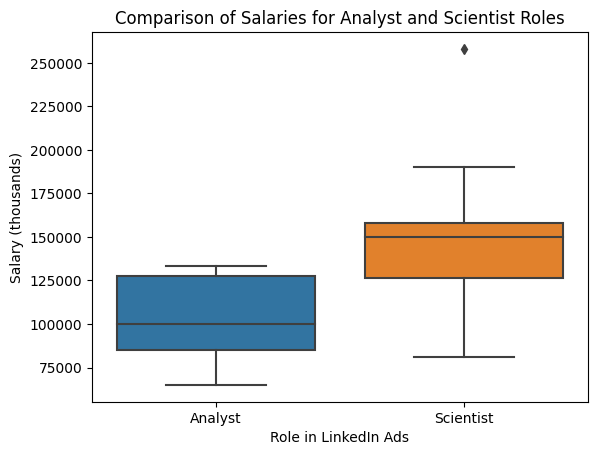

In [17]:
#chosen plots/visuals most important differences
sns.boxplot(data=df_na, x="Type",y="Salary")
#for slides box plot of salary-type
#specify axis labels
plt.xlabel('Role in LinkedIn Ads')
plt.ylabel('Salary (thousands)')
plt.title('Comparison of Salaries for Analyst and Scientist Roles')
plt.show()

In [38]:
df_na.groupby('Type')['Salary'].describe() #box plot specifics

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Analyst,13.0,104010.230769,24573.575795,65000.0,85000.0,100000.0,127333.0,133100.0
Scientist,19.0,145823.157895,40500.465299,81300.0,126500.0,150000.0,158120.0,258000.0


The first main difference we wanted to highlight is the salary disparity between the data analysts and data scientists ads. As illustrated by the above box-plot, scientist ads offer a higher average pay along with a wider salary range overall from eighty thousand to two-hundred thousand compared the analyst ads ranging from sixty-five thousand to one-hundred thirty thousand.

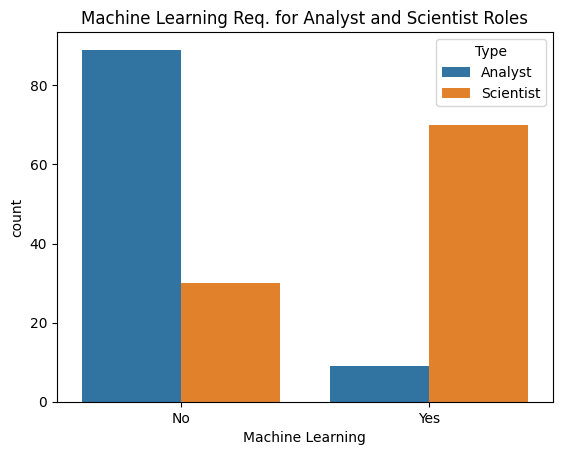

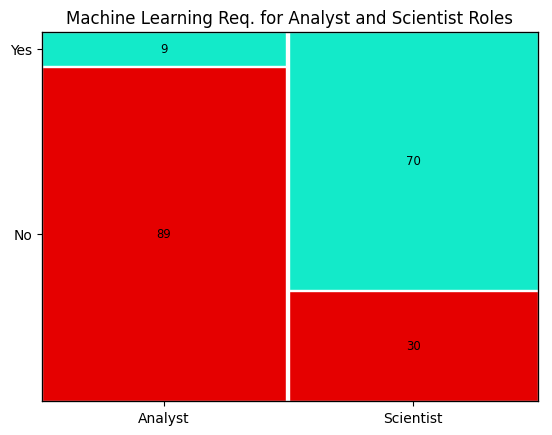

In [19]:
#For slides Machine Learning for the two roles
sns.countplot(data=df_plot, x="Machine Learning", hue="Type").set(title="Machine Learning Req. for Analyst and Scientist Roles")  #count plot for type for ML

## ML-Type (mosaic)
props={}
props[('Machine Learning','Yes')]={'facecolor':'red', 'edgecolor':'white'}
props[('Machine Learning','No')]={'facecolor':'red', 'edgecolor':'white'}
props[('Analyst','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Analyst','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
props[('Scientist','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Scientist','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
labelizer=lambda k:{('Analyst','Yes'):9,('Scientist','Yes'):70,
                    ('Analyst','No'):89,('Scientist','No'):30}[k]
mosaic(df_plot,['Type','Machine Learning'],labelizer=labelizer,properties=props)

plt.ylabel('Machine Learning')
plt.title('Machine Learning Req. for Analyst and Scientist Roles')
plt.show()

The machine learning requirements for the ads differed great between data analyst and data scientist roles. Almost all postings for analyst positions did not require machine learning, with only nine analyst job ads mentioning machine learning qualifications. On the other hand, machine learning is a requirement for a majority of data scientist positions, with seventy ads requiring machine learning qualifications.

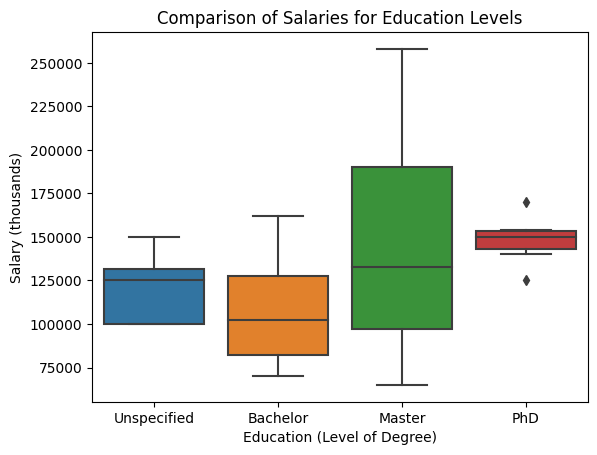

In [20]:
#box for education and salary
sns.boxplot(data=df_na, x="Education",y="Salary")
plt.xlabel('Education (Level of Degree)')
plt.ylabel('Salary (thousands)')
plt.title('Comparison of Salaries for Education Levels')
plt.show()

In [42]:
df_na.groupby('Education')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,10.0,106733.300000,29711.762729,70000.0,82225.0,102500.0,127833.25,162000.0
Master,7.0,147257.142857,68227.111110,65000.0,97250.0,133000.0,190150.00,258000.0
PhD,8.0,148255.000000,12906.573076,125000.0,142850.0,150000.0,153310.00,170000.0
Unspecified,7.0,119800.000000,19902.177435,100000.0,100250.0,125000.0,131550.00,150000.0


The salary disparity is also emphasized in the difference between education levels required. As expected, positions requiring at most a Bachelors degree has the lowest salary range compared to ads with the PhD or Masters requirement. From the box-plot, a Masters degree has a wide salary range but still a lower median salary compared to the highest education level, PhD.

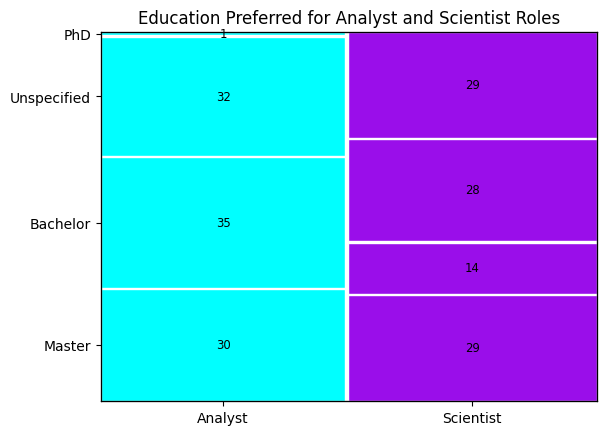

In [23]:
##Educ-Type(mosaic)
props={}
props[('Analyst','Bachelor')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Scientist','Bachelor')]= {'facecolor':'xkcd:violet','edgecolor':'white'}
props[('Analyst','Master')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Scientist','Master')]= {'facecolor':'xkcd:violet','edgecolor':'white'}
props[('Analyst','PhD')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Scientist','PhD')]= {'facecolor':'xkcd:violet','edgecolor':'white'}
props[('Analyst','Unspecified')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Scientist','Unspecified')]= {'facecolor':'xkcd:violet','edgecolor':'white'}
labelizer=lambda k:{('Analyst','Bachelor'):35,('Analyst','Master'):30,('Analyst','PhD'):1,('Analyst','Unspecified'):32,
                    ('Scientist','Bachelor'):14,('Scientist','Master'):29,('Scientist','PhD'):29,('Scientist','Unspecified'):28}[k]
mosaic(df_plot,['Type','Education'],labelizer=labelizer,properties=props)
plt.ylabel('Salary (thousands)')
plt.title('Education Preferred for Analyst and Scientist Roles')
plt.show()

Looking at the education level breakdown between the two roles, the majority of data analyst postings require at most a Bacherlors or Masters; however, data scientist postings mostly require a degree level above a Bachelors degree. Only fourteen ads for data scientist had Bachelors degrees as the highest level of education mentioned, but twenty-nine ads desired a PhD level of education, compared to only one ad wanting a PhD for a data analyst. This suggests there is a high chance the employer will want a PhD for a data scientist position while a Bachelor's degree will most likely land you the role of an Analyst.


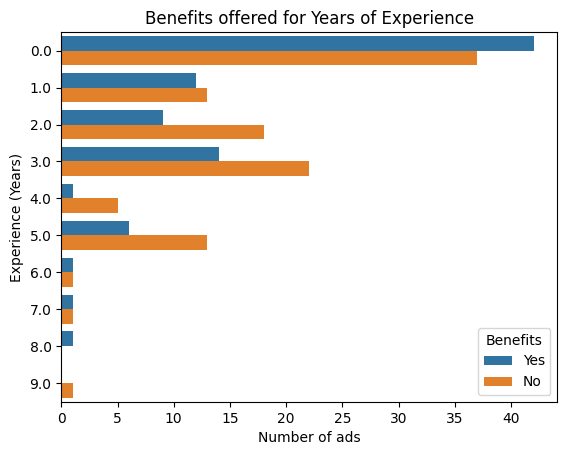

In [21]:
#bar/countplot for years of experience and benefits offered
sns.countplot(data=df_plot, y='Experience',hue="Benefits")
plt.xlabel('Number of ads')
plt.ylabel('Experience (Years)')
plt.title('Benefits offered for Years of Experience')
plt.show()

Surprisingly as the years of experience increases from these various job postings, the amount of benefits offered actually decreases. 

In [45]:
#Pearson correlations
sal_corr=df_na['Languages'].corr(df_plot['Salary'])
sal_corr

-0.04721513282159853

In [46]:
#Pearson correlation for benefits
exp_corr=df_plot['Languages'].corr(df_plot['Experience'])
exp_corr

-0.0006014555481984774

In [47]:
#Pearson correlation for salary and experience
sal_exp_corr=df_na['Salary'].corr(df_na['Experience'])
sal_exp_corr

-0.18714477785800285

In [ ]:
#Appendix code (don't run)
#Data collection code
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup 
import nltk
import numpy as np
import re
from nltk.corpus import wordnet
from selenium import webdriver

def raw_text(url):
    """Takes a URL as input and performs web scrapping to retrieve the body of the
    webpage (in this case a Linkedin ad)"""
    ad = requests.get(url) #Retrieve webpage
    Html = BeautifulSoup(ad.text, 'html.parser') #Convert html into a nicer format
    text_body = Html.find_all('div', 
                              {'class':"show-more-less-html__markup show-more-less-html__markup--clamp-after-5"})
    text_body = text_body[0].text
    return text_body
def clean_text(doc):
    """Take an unstructured document and tokenize it into a list of words. 
    Then standardize it by lowercasing and lemmatizing each word"""
    words = re.findall(r'(?:[a-zA-Z]|#|"+")+',doc) #Find all alphabetical words (Preserve + and # for C++ and C#)
    clean = [i for i in words if i.isupper() or i.islower()] #Retrieve all words that aren't glued to each other
    dirty = [i for i in words if not i.islower() and not i.isupper()] #Retrieve words stuck together
    dirty = [re.findall('[a-zA-Z][^A-Z]*',i) for i in dirty] #Split all the tangled words ie split 'ThisExample' into ['This','Example']
    clean2 = [j for i in dirty for j in i] #Unlist the list of lists
    words = clean + clean2 #Combine all the words together
    stopwords = nltk.corpus.stopwords.words("english")
    words = [i.lower() for i in words] #Lowercase all words
    words = [i for i in words if i not in stopwords] #Filter out stopwords
    tag_words = nltk.pos_tag(words) #Begin lemmatizing by tagging each word
    tag_words = [(i, wordnet_pos(j)) for (i, j) in tag_words] #Convert the tags into something the lemmatizer understands
    lemmatizer = nltk.WordNetLemmatizer()
    clean_words = [lemmatizer.lemmatize(i, j) for i, j in tag_words] #Lemmatize the words
    #Document should be cleaned up
    return clean_words
def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN) #Function created by Bo Ning in Week 6-2
def lang_count(TXT):
    """ Take a body of clean text and count the number of programming languages present"""
    languages = ['python','r','sql','sa','c',
                 'c++','c#','java','javascript',
                 'julia','matlab','swift','tableau',
                'microsoft','github','excel'] #SAS turns into sa after lemmatization
    #ADD MORE LANGUAGES IF NECESSARY
    count = sum([i in TXT for i in languages]) #Check if each language is in the ad
    #And sum the number of programming languages present
    return count
def get_salary(TXT):
    """From a body of raw text, retrieve the salary"""
    salaries = re.findall(r"(\$\d+\,\d+\.\d{1,2})",TXT) #Find all numbers with $ , and .
    if salaries != []:
        return salaries[-1] #Let's work with the maximum salary
    else:
        salaries = re.findall(r"(\$\d+\,\d+)",TXT)  #Account for no decimals too!
        if salaries != []:
            return salaries[-1]
        else: #If list is empty no salary is present and return NA
            return None
def ML_skill(TXT):
    """Using a body of clean text, check whether the words machine learning is present
    to see if it is a required skill"""
    if ('machine' in TXT and 'learn' in TXT) or ('ml' in TXT): #Check for the words related to machine learning
        return 'Yes' #If it's present return yes as in machine learning is required
    else:
        return 'No'
def get_edu(TXT):
    """Using a body of raw text, retrieve the highest education level"""
    if "PhD" in TXT or 'Ph.D' in TXT: #Start looking for PhD to see if it's the highest education listed
        return "PhD"
    elif "Master" in TXT or 'MS' in TXT or 'MA' in TXT:#If PhD is absent do the same thing with masters
        return "Master"
    elif "Bachelor" in TXT or 'BS' in TXT or 'BA' in TXT:
        return "Bachelor"
    else:
        return None #No education specified
def benefits(TXT):
    """Using a body of raw text, check if benefits are included"""
    if 'Benefit' in TXT or 'benefit' in TXT: #Check if benefit is in the ad to determine whether benefits are included
        return 'Yes'
    else:
        return 'No'
def exp(TXT):
    """Using a body of raw text, check if experience is required/preferred"""
    sentences = nltk.sent_tokenize(TXT) #Split text into sentences
    years = [re.findall(r"\d+.*year", i) for i in sentences] #Find sentences with years in it
    for items in years:
        if items != []:
            years = [i for i in years if i != []][0][0] #Get rid of empty values and turn the years of experience into a string
            year = re.findall(r'\d+',years)[0]
            return year
    return None #If we make it through the loop years of experience is absent and return NA
def collect_data(url):
    """Input a URL for a Linkedin Ad and retrieve all relevant data"""
    raw = raw_text(url)
    clean = clean_text(raw)
    return {'Languages':lang_count(clean),
            'Salary':get_salary(raw),
            'Machine Learning':ML_skill(clean),
            'Education':get_edu(raw),
            'Benefits':benefits(raw),
            'Experience':exp(raw),
            'url':url}
url = [
    'https://www.linkedin.com/jobs/view/3249211510/?alternateChannel=search&refId=VD198ZoVfaKwgiB8zkGpbw%3D%3D&trackingId=BqYouS74cmZGHpxL9C2ZGA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3487242175/?alternateChannel=search&refId=JXABqO3QZgv%2BLHOKFDE7fw%3D%3D&trackingId=N9I6sffo3LQS3fZ%2BA%2BKsEg%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3505418682/?alternateChannel=search&refId=%2BpaSeyQbeKD%2BxYKKAizIPQ%3D%3D&trackingId=0Lxb1PxTW7n%2FDV7rrhIG8Q%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3498974602/?alternateChannel=search&refId=UgS%2BLnzOxzd0o5lfBwrIUg%3D%3D&trackingId=gzR56kYgzIfDemBhp74f6g%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3508607089/?alternateChannel=search&refId=mjF%2Bzo2ld8vXVKBKARXTYA%3D%3D&trackingId=loqcIsi7A8CL8Vmop62OSg%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3456862041/?alternateChannel=search&refId=mjF%2Bzo2ld8vXVKBKARXTYA%3D%3D&trackingId=juDPb5S4%2ByysHmbv9JDl5g%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3507843178/?alternateChannel=search&refId=mjF%2Bzo2ld8vXVKBKARXTYA%3D%3D&trackingId=XHD%2B27dW8g8P%2BKaCAw4emQ%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3507141700/?alternateChannel=search&refId=mjF%2Bzo2ld8vXVKBKARXTYA%3D%3D&trackingId=P54YAehQYvhHb1JvgxN8ag%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3492916139/?alternateChannel=search&refId=NWABB47NCvXLKrd7Ykt7TA%3D%3D&trackingId=a3nC%2BSZ6wfMUPl3mewKU1g%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3499269839/?alternateChannel=search&refId=NWABB47NCvXLKrd7Ykt7TA%3D%3D&trackingId=V6OqJudkv7yK35YLX9NdbA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3499255853/?alternateChannel=search&refId=NWABB47NCvXLKrd7Ykt7TA%3D%3D&trackingId=mJh5WrzLB4mTkKzDIU3zXw%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3511632332/?alternateChannel=search&refId=mjF%2Bzo2ld8vXVKBKARXTYA%3D%3D&trackingId=lEarBtUbrbcWqTvWU6XeOQ%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3505403106/?alternateChannel=search&refId=mjF%2Bzo2ld8vXVKBKARXTYA%3D%3D&trackingId=ZwAL4nT5X%2F%2BZqwyio47svA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3512272186/?alternateChannel=search&refId=mjF%2Bzo2ld8vXVKBKARXTYA%3D%3D&trackingId=DuDxT6L0wnOVfyTzr789Xg%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3499126864/?alternateChannel=search&refId=NWABB47NCvXLKrd7Ykt7TA%3D%3D&trackingId=StIEWFb2FP%2FWkYGpYw24Nw%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3505977879/?alternateChannel=search&refId=mjF%2Bzo2ld8vXVKBKARXTYA%3D%3D&trackingId=WkyM1jycSWWDghtmqQcMlw%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3509655528/?alternateChannel=search&refId=gPWJCLIvYpWYFGgTxJqtJw%3D%3D&trackingId=Vt2F8v9iONwtg%2BQnfuGIow%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3505977879/?alternateChannel=search&refId=gPWJCLIvYpWYFGgTxJqtJw%3D%3D&trackingId=Dlqta%2BGB01lG1%2FZ3C0q7AQ%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3487142091/?alternateChannel=search&refId=eUf97BLKMcJCe7F8oZDXrQ%3D%3D&trackingId=Cqns7vrChI9d3IyXc4sWhA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3488691439/?alternateChannel=search&refId=NWABB47NCvXLKrd7Ykt7TA%3D%3D&trackingId=7QSNY3MZRgXIP%2F7L9Hb6TA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3491778866/?alternateChannel=search&eBP=CwEAAAGGrnZxmz-4qudDf0AdmTbtkBai6eckvna0nULvtPTyWR3KcRAlWohbkoheImFe6yrm0PJGCqms3ANrie3eQ-zOxZRQbiemcoTXSvd0m2aUuSP3_shuvJGjJAFGTLmtgwN8SjwrMcqjk57QmvxZRVbL4iCeeS8GhQGSatY6sMgtNtBK1wWP4hgWr5bULp_WIt9nkD_D-V4Q-Ef0ncD9AzGOw4o3s6vEaWVcp-b_CThnm8pycRz5T6xECAOSoKAn_8Et9HMrH6T-isrNFi7vAE37x5hbjg1EXnXR1q45NOObNqm8v_D169Q-ZXScDreN2dYIuPSehS4TtesZZioygUYMZV0nVrjeu25ZQN8onUq1eIxTWgflHdowbddk3ti6BI8kOQ&refId=NWABB47NCvXLKrd7Ykt7TA%3D%3D&trackingId=QYFx7G1E1JVHSs1rAAH6%2Bw%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3496731411/?alternateChannel=search&refId=eUf97BLKMcJCe7F8oZDXrQ%3D%3D&trackingId=WHPyV1Ya1NlCbfjMXJjV%2BQ%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3488630612/?alternateChannel=search&refId=NWABB47NCvXLKrd7Ykt7TA%3D%3D&trackingId=0HkaQFncmzSAAm1VAFz%2F6g%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3496102239/?alternateChannel=search&refId=NWABB47NCvXLKrd7Ykt7TA%3D%3D&trackingId=JiYcbVpm%2BKz%2Fl9HpYKM2ow%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3495674661/?alternateChannel=search&refId=NWABB47NCvXLKrd7Ykt7TA%3D%3D&trackingId=B1rPbwrTjIzCrTSyGxGDdw%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3491959780/?alternateChannel=search&refId=UgS%2BLnzOxzd0o5lfBwrIUg%3D%3D&trackingId=yCZVySVeiQvNcAs8tV7O5g%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3482557663/?alternateChannel=search&refId=bUuSO67FACleck0qLIsOEw%3D%3D&trackingId=eFtodEnJq8%2FvDhGKTFy9vA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3497655155/?alternateChannel=search&refId=bUuSO67FACleck0qLIsOEw%3D%3D&trackingId=yaesC0%2FtNjjOxUrebgAuow%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3496092247/?alternateChannel=search&refId=tD86EsvkK2i9il%2BaH3%2FXhQ%3D%3D&trackingId=MwHDvID6jzlUD%2BPT1jU%2FdA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3493897268/?alternateChannel=search&refId=bUuSO67FACleck0qLIsOEw%3D%3D&trackingId=GBF0o%2BqVmbDn5c36zI4qcQ%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3496092247/?alternateChannel=search&refId=VHK7B18qKFlkneKMGosKdg%3D%3D&trackingId=1rwG%2BDddA1JXaBxCVyhSyg%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3495686468/?alternateChannel=search&refId=bUuSO67FACleck0qLIsOEw%3D%3D&trackingId=SnethqT%2B4%2Fa89lESpJllDw%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3485531526/?alternateChannel=search&refId=bUuSO67FACleck0qLIsOEw%3D%3D&trackingId=eRDs7hsAjfDBS8Tt8iIThQ%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3503792094/?alternateChannel=search&refId=bUuSO67FACleck0qLIsOEw%3D%3D&trackingId=P%2FRB55O%2B%2BGYAP8gTL9ugzQ%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3495654543/?alternateChannel=search&refId=bUuSO67FACleck0qLIsOEw%3D%3D&trackingId=lc3G0c8WgTlWBNO0saNtbg%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3495654842/?alternateChannel=search&refId=bUuSO67FACleck0qLIsOEw%3D%3D&trackingId=zn%2FE4wTVmE%2F1Z1f4C2ZVKA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3491485328/?alternateChannel=search&refId=bUuSO67FACleck0qLIsOEw%3D%3D&trackingId=fzlqSgFB2yLvKnF%2BhSCwNA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3491485328/?alternateChannel=search&refId=bUuSO67FACleck0qLIsOEw%3D%3D&trackingId=fzlqSgFB2yLvKnF%2BhSCwNA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3480285201/?alternateChannel=search&refId=bUuSO67FACleck0qLIsOEw%3D%3D&trackingId=oKy93LI7m48hkD5o%2FU0Gaw%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3488092382/?alternateChannel=search&refId=bUuSO67FACleck0qLIsOEw%3D%3D&trackingId=uMo5pboZR48Oo%2B0SoQup6g%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3500262772/?alternateChannel=search&refId=bUuSO67FACleck0qLIsOEw%3D%3D&trackingId=73%2FfPVUyE3OOrGXUb%2FmCWA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3489487289/?alternateChannel=search&refId=bUuSO67FACleck0qLIsOEw%3D%3D&trackingId=lx8CV2%2Fymqo3tMC%2BI4hsYQ%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3495634532/?alternateChannel=search&refId=bUuSO67FACleck0qLIsOEw%3D%3D&trackingId=MFGxvS1mP%2BSqvl3o%2Fu1Sxg%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3494529354/?alternateChannel=search&refId=bUuSO67FACleck0qLIsOEw%3D%3D&trackingId=KmkV0t2YATwAzRNVksZZKA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3494564440/?alternateChannel=search&refId=bUuSO67FACleck0qLIsOEw%3D%3D&trackingId=V0rJXgQpqFgEFsEjKH9nIA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3495693106/?alternateChannel=search&refId=dkG0OgTVkJlbNe5Acdpd%2BA%3D%3D&trackingId=CX0IhX5V77rvigNHMkIrrQ%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3487777637/?alternateChannel=search&refId=dkG0OgTVkJlbNe5Acdpd%2BA%3D%3D&trackingId=BgtW%2FNgcmVtsXQiKzYtNoA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3487709897/?alternateChannel=search&refId=dkG0OgTVkJlbNe5Acdpd%2BA%3D%3D&trackingId=PShEgSQ3izBxrBULeHxCkA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3512466597/?alternateChannel=search&refId=dkG0OgTVkJlbNe5Acdpd%2BA%3D%3D&trackingId=%2FyLV2WJVdHyZomxOtwp4jA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3495654381/?alternateChannel=search&refId=dkG0OgTVkJlbNe5Acdpd%2BA%3D%3D&trackingId=5FlcyfVV9LL3fKelk0mxKw%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3497733873/?alternateChannel=search&refId=dkG0OgTVkJlbNe5Acdpd%2BA%3D%3D&trackingId=lnnR0DzdirfW1u1zNtOlPw%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3499554593/?alternateChannel=search&refId=dkG0OgTVkJlbNe5Acdpd%2BA%3D%3D&trackingId=B3KwFaQdacHuzEgbG%2FG8bQ%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3494451117/?alternateChannel=search&refId=dkG0OgTVkJlbNe5Acdpd%2BA%3D%3D&trackingId=N4k%2FFHwodKXVcTP%2FmHLYqw%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3512451344/?alternateChannel=search&refId=dkG0OgTVkJlbNe5Acdpd%2BA%3D%3D&trackingId=5XaohZQ6qB63Z7tIIjjhQA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3494238784/?alternateChannel=search&refId=dkG0OgTVkJlbNe5Acdpd%2BA%3D%3D&trackingId=igZN8F%2BOFt6%2Byp2snzd8YQ%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3500266283/?alternateChannel=search&refId=dkG0OgTVkJlbNe5Acdpd%2BA%3D%3D&trackingId=kclMX7LrdETh0v4POX0vLw%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3495578342/?alternateChannel=search&refId=dkG0OgTVkJlbNe5Acdpd%2BA%3D%3D&trackingId=0Ob422e1FO0DIIXMvSm5EQ%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3490804946/?alternateChannel=search&refId=dkG0OgTVkJlbNe5Acdpd%2BA%3D%3D&trackingId=cuqQcFpGS9y5yq7gb3UV7Q%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3512520788/?alternateChannel=search&refId=dkG0OgTVkJlbNe5Acdpd%2BA%3D%3D&trackingId=mjG2eaO8VZpMtzSy4P3Owg%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3490303130/?alternateChannel=search&refId=dkG0OgTVkJlbNe5Acdpd%2BA%3D%3D&trackingId=4zpQrFg96sHFDEjZ3zdqBg%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3493909748/?alternateChannel=search&refId=dkG0OgTVkJlbNe5Acdpd%2BA%3D%3D&trackingId=1HilajB3LHEsvebT4PNQTg%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3485549081/?alternateChannel=search&refId=dkG0OgTVkJlbNe5Acdpd%2BA%3D%3D&trackingId=tBtPBbnxI%2BnQb68734FC1Q%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3496797402/?alternateChannel=search&refId=dkG0OgTVkJlbNe5Acdpd%2BA%3D%3D&trackingId=KcmjmUD7%2F7bG%2FZlZlX0qtA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3507194381/?alternateChannel=search&refId=dkG0OgTVkJlbNe5Acdpd%2BA%3D%3D&trackingId=qyDp2TbPLRTBq2maWevV6g%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3488658887/?alternateChannel=search&refId=dkG0OgTVkJlbNe5Acdpd%2BA%3D%3D&trackingId=SRHp0scNNRfnjwftbEAPoQ%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3505492538/?alternateChannel=search&refId=tjE8t1GFVv2h1AdFOsRIzA%3D%3D&trackingId=pQS1%2BXa7jJ5c5ORNPG2oDw%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3505496763/?alternateChannel=search&refId=tjE8t1GFVv2h1AdFOsRIzA%3D%3D&trackingId=Ky1AMuFgVY0eg5xWXAV6pA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3496431666/?alternateChannel=search&refId=tjE8t1GFVv2h1AdFOsRIzA%3D%3D&trackingId=BIxqiZZTckSPgzv7Eo0JYw%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3511827145/?alternateChannel=search&refId=tjE8t1GFVv2h1AdFOsRIzA%3D%3D&trackingId=XHmIhAk%2BQvSuRU%2BaeYe88A%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3512429439/?alternateChannel=search&refId=tjE8t1GFVv2h1AdFOsRIzA%3D%3D&trackingId=n8SEoeoz1dfLqu47MuFjIA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3512515787/?alternateChannel=search&refId=tjE8t1GFVv2h1AdFOsRIzA%3D%3D&trackingId=rsvwuW%2BCsyvBzd3tFuKprg%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3505448647/?alternateChannel=search&refId=tjE8t1GFVv2h1AdFOsRIzA%3D%3D&trackingId=V6v0QByb4WC%2BUTOlI4Vv9A%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3507896566/?alternateChannel=search&refId=tjE8t1GFVv2h1AdFOsRIzA%3D%3D&trackingId=C%2Fb04eEQ2XPmAhNMYmxTrw%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3505424217/?alternateChannel=search&refId=tjE8t1GFVv2h1AdFOsRIzA%3D%3D&trackingId=eWfeN2eGi2trEqZzQHTpwA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3505905528/?alternateChannel=search&refId=tjE8t1GFVv2h1AdFOsRIzA%3D%3D&trackingId=zsbcfe9%2BZyo2KpmJUx2LLw%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3500269812/?alternateChannel=search&refId=tjE8t1GFVv2h1AdFOsRIzA%3D%3D&trackingId=XtAo8iXdP8AvjWWwD8nD6Q%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3511369169/?alternateChannel=search&refId=tjE8t1GFVv2h1AdFOsRIzA%3D%3D&trackingId=MMecUSa%2BH63rhaZ%2FFRZR6w%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3495610932/?alternateChannel=search&refId=tjE8t1GFVv2h1AdFOsRIzA%3D%3D&trackingId=J3JlNhwuDXXFk%2BzWOwTiMg%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3507844077/?alternateChannel=search&refId=tjE8t1GFVv2h1AdFOsRIzA%3D%3D&trackingId=eg3UbzwOtVX1ODBaF0EmKQ%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3507860531/?alternateChannel=search&refId=tjE8t1GFVv2h1AdFOsRIzA%3D%3D&trackingId=Snpgxpd6WRLVZpJbHpBDzw%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3490606955/?alternateChannel=search&refId=PoisozcNOKyt2tr%2Fz76%2BRA%3D%3D&trackingId=DCxbydnFgo3SRPa%2FHTYJUA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3493466568/?alternateChannel=search&refId=PoisozcNOKyt2tr%2Fz76%2BRA%3D%3D&trackingId=sTkNRmT6MNXgFu82uvfz6A%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3495647309/?alternateChannel=search&refId=PoisozcNOKyt2tr%2Fz76%2BRA%3D%3D&trackingId=RkJ%2FKZoNLXDamjy887uYYg%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3494073924/?alternateChannel=search&refId=PoisozcNOKyt2tr%2Fz76%2BRA%3D%3D&trackingId=gWsH6wbX8xqRYkZq7r4AFQ%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3485575875/?alternateChannel=search&refId=PoisozcNOKyt2tr%2Fz76%2BRA%3D%3D&trackingId=NsRV%2FetbSd8wHxul61SKLw%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3498811906/?alternateChannel=search&refId=PoisozcNOKyt2tr%2Fz76%2BRA%3D%3D&trackingId=rDebeUGzBQw19sg98lGXzw%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3494592372/?alternateChannel=search&refId=PoisozcNOKyt2tr%2Fz76%2BRA%3D%3D&trackingId=jtLvE1kETibm%2BJVF0Xak%2BA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3486412422/?alternateChannel=search&refId=PoisozcNOKyt2tr%2Fz76%2BRA%3D%3D&trackingId=LFl2SSkSQUGLNKZAOjBwZA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3498130371/?alternateChannel=search&refId=PoisozcNOKyt2tr%2Fz76%2BRA%3D%3D&trackingId=S5%2F3%2FvefEvnT%2FGDg6OSkPw%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3501081381/?alternateChannel=search&refId=PoisozcNOKyt2tr%2Fz76%2BRA%3D%3D&trackingId=BdLYQyqU14CzyrYTmJYlmQ%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3495815900/?alternateChannel=search&refId=PoisozcNOKyt2tr%2Fz76%2BRA%3D%3D&trackingId=9Vm07nw6qvAl1PI7N2og%2BA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3489481743/?alternateChannel=search&refId=PoisozcNOKyt2tr%2Fz76%2BRA%3D%3D&trackingId=P3kK82gRd%2BMURBwBr21qLw%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3495476456/?alternateChannel=search&refId=PoisozcNOKyt2tr%2Fz76%2BRA%3D%3D&trackingId=Dt%2F%2Fz%2B4jn3qiAjzOkKCaiA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3489526424/?alternateChannel=search&refId=UgS%2BLnzOxzd0o5lfBwrIUg%3D%3D&trackingId=%2FRUhZbHsdO6F6vJ%2BYNSkdw%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3488623693/?alternateChannel=search&refId=UgS%2BLnzOxzd0o5lfBwrIUg%3D%3D&trackingId=PSYr740wMPbe%2FZZx%2BPCQxA%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3492602300/?alternateChannel=search&refId=UgS%2BLnzOxzd0o5lfBwrIUg%3D%3D&trackingId=wSyeZXXhgtMUxl2lkOdp5w%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3503741339/?alternateChannel=search&refId=UgS%2BLnzOxzd0o5lfBwrIUg%3D%3D&trackingId=zIhbNtFJmy5ZXEu1GBnZ8A%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3497727530/?alternateChannel=search&refId=UgS%2BLnzOxzd0o5lfBwrIUg%3D%3D&trackingId=02ldEIy%2BIL%2BUrVUe5BOc0w%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3497727530/?alternateChannel=search&refId=UgS%2BLnzOxzd0o5lfBwrIUg%3D%3D&trackingId=02ldEIy%2BIL%2BUrVUe5BOc0w%3D%3D&trk=d_flagship3_search_srp_jobs',
    'https://www.linkedin.com/jobs/view/3488239050/?alternateChannel=search&refId=UgS%2BLnzOxzd0o5lfBwrIUg%3D%3D&trackingId=xFWvNOU50J5jZ9TTsXwDRA%3D%3D&trk=d_flagship3_search_srp_jobs'
]
data_analyst1= [collect_data(i) for i in url[0:10]] 
data_analyst2 = [collect_data(i) for i in url[10:20]]
data_analyst3 = [collect_data(i) for i in url[20:30]]
data_analyst4 = [collect_data(i) for i in url[30:40]]
data_analyst5 = [collect_data(i) for i in url[40:50]]
data_analyst6 = [collect_data(i) for i in url[50:60]]
data_analyst7 = [collect_data(i) for i in url[60:70]]
data_analyst8 = [collect_data(i) for i in url[70:80]]
data_analyst9 = [collect_data(i) for i in url[80:90]]
data_analyst10 = [collect_data(i) for i in url[90:100]]
#create one list
data_analyst_final =  (
    data_analyst1 + 
    data_analyst2 + 
    data_analyst3 +
    data_analyst4 +
    data_analyst5 +
    data_analyst6 +
    data_analyst7 +
    data_analyst8 +
    data_analyst9 +
    data_analyst10) #merge the data_analyst folds
len(data_analyst_final)
#check length of each sublist
print(len(data_analyst1))
print(len(data_analyst2))
print(len(data_analyst3))
print(len(data_analyst4))
print(len(data_analyst5))
print(len(data_analyst6))
print(len(data_analyst7))
print(len(data_analyst8))
print(len(data_analyst9))
print(len(data_analyst10))
def f(x):
    x= x.strip("$")
    x= x.replace(',','')
    return x
df.loc[~df ["Salary"].isna(),"Salary"]=df.loc[~df['Salary'].isna(),'Salary'].map(f)
df['Salary']= df['Salary'].astype(float)
#creates csv file
df.to_csv('data_analyst.csv')
#pairs plots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
#read in the csv's
df_analyst=pd.read_csv('data_analyst.csv')
df_scientist = pd.read_csv('data_scientist.csv')
#strips dollar sign/ cleans the salary column
def f(x):
    x= x.strip("$")
    x= x.replace(',','')
    return x
df_scientist.loc[~df_scientist["Salary"].isna(),"Salary"]=df_scientist.loc[~df_scientist['Salary'].isna(),'Salary'].map(f)
df_scientist['Salary']= df_scientist['Salary'].astype(float)
df_scientist.head()
#combine the two pd dataframes
df = pd.concat([df_analyst.reset_index(drop=True), df_scientist.reset_index(drop=True)], axis=0,ignore_index=True)

del df_plot[df_plot.columns[0]] #delete index column
df = df.drop_duplicates()

df_plot=df #just in case to compare with original combined df
df_plot.head()

#Only for the salary pairs
df_na = df.loc[df['Salary'] != 96955.0]
df_na = df_na.loc[df_na['Salary'] != 144500.0]
df_na.to_csv('with_category.csv')
df_na.head() #unfactorized categories dataset 

#for everything that isn't salary use df_plot
df_na.to_csv('with_category.csv')
len(df_na)
#figure, axes and axis
fig, axes = plt.subplots(nrows=7, ncols = 7,figsize=(20, 20), layout = 'constrained')

#Language on itself
sns.kdeplot(df_plot, x="Languages",ax=axes[0][0])
ax=axes[0][0].set_title('Languages')
ax=axes[0][0].set_ylabel('Languages')

#Lang-Salary coef
sal_corr=df_na['Languages'].corr(df_na['Salary'])
ax=axes[0][1].text(0.1, 0.5,'Corr:-0.047', fontsize=15)
ax=axes[0][1].set_title('Salary')


#Language-Machine Learning (box)
sns.boxplot(data=df_plot, x="Machine Learning",y="Languages",ax=axes[0][2])
ax=axes[0][2].set_xlabel('Machine Learning')
ax=axes[0][2].set_ylabel('Languages')
ax=axes[0][2].set_title('Machine Learning')

#Language-Education (box)
sns.boxplot(data=df_plot, x="Education",y="Languages",ax=axes[0][3])
ax=axes[0][3].set_xlabel('Education')
ax=axes[0][3].set_ylabel('Languages')
ax=axes[0][3].set_title('Education')

#Language-Benefits (box)
sns.boxplot(data=df_plot, x="Benefits",y="Languages",ax=axes[0][4])


ax=axes[0][4].set_title('Benefits')

#Language-Experience (correlation coef)
ax=axes[0][5].text(0.1, 0.5,'Corr:-0.170', fontsize=15)


ax=axes[0][5].set_title('Experience')

#Language-Type (box)
sns.boxplot(data=df_plot, x="Type",y="Languages",ax=axes[0][6])
ax=axes[0][6].set_xlabel('Type')
ax=axes[0][6].set_ylabel('Languages')
ax=axes[0][6].set_title('Type')

#Columns
#Language-Salary(scatterplot)
sns.scatterplot(df_na, x="Languages", y="Salary",ax=axes[1][0])
ax=axes[1][0].set_xlabel('Languages')
ax=axes[1][0].set_ylabel('Salary')

#Language-Machine Learning (bar)
sns.countplot(data=df_plot, x="Machine Learning",hue="Languages",ax=axes[2][0])

ax=axes[2][0].set_ylabel('Machine Learning')

#Language-Education (bar)
sns.countplot(data=df_plot, x="Languages",hue="Education",ax=axes[3][0])
ax=axes[3][0].set_ylabel('Education')

#Language-Benefits (bar)
sns.countplot(data=df_plot, x="Languages",hue="Benefits",ax=axes[4][0])
ax=axes[4][0].set_ylabel('Benefits')

#Language-Experience (scatterplot)
sns.scatterplot(df_plot, x="Languages", y="Experience",ax=axes[5][0])
ax=axes[5][0].set_ylabel('Experience')

#Language-Type (bar)
sns.countplot(data=df_plot, x="Languages",hue="Type",ax=axes[6][0])
ax=axes[6][0].set_xlabel('Type')
ax=axes[6][0].set_ylabel('Type')

##Salary
#rows
##Salary itself
sns.kdeplot(df_na, x="Salary",ax=axes[1][1])
##Salary-Machine Learning (box)
sns.boxplot(data=df_na, x="Machine Learning",y="Salary" ,ax=axes[1][2])
##Salary-Education (box)
sns.boxplot(data=df_na, x="Education",y="Salary",ax=axes[1][3])
##Salary-Benefits (box)
sns.boxplot(data=df_na, x="Benefits",y="Salary",ax=axes[1][4])
##Experience (correlation coef)
ax=axes[1][5].text(0.1, 0.5,'Corr:-0.187', fontsize=15)
##Type (box)
sns.boxplot(data=df_na, x="Type",y="Salary", ax=axes[1][6])

#column
##Sal-Machine Learning (bar) (subfigures)
sns.kdeplot(data=df_na, x="Salary", hue="Machine Learning", cut=0, fill=True, common_norm=False, alpha=0.4,ax=axes[2][1])
#sns.barplot(data=df_na, x="Machine Learning",y="Salary", ax=axes[2][1])
###wei says to just adjust transparency or colors rather than try to make subfigures and split the grid

##Sal-Education (bar)
##sns.barplot(data=df_na, y="Salary",x="Education", ax=axes[3][1])
sns.kdeplot(data=df_na, x="Salary", hue="Education", cut=0, fill=True, common_norm=False, alpha=0.4,ax=axes[3][1])
##Sal-Benefits (bar)
##sns.barplot(data=df_na, y="Salary",x="Benefits", ax=axes[4][1])
sns.kdeplot(data=df_na, x="Salary", hue="Benefits", cut=0, fill=True, common_norm=False, alpha=0.4,ax=axes[4][1])
##Sal-Experience (scatterplot)
sns.scatterplot(df_na, x="Salary", y="Experience",ax=axes[5][1])
##Sal-Type (stacked bar)
##sns.barplot(data=df_na, x="Type",y="Salary", ax=axes[6][1])
sns.kdeplot(data=df_na, x="Salary", hue="Type", cut=0, fill=True, common_norm=False, alpha=0.4,ax=axes[6][1])

#Machine Learning
#Row
##Machine Learning (bar on itself)
sns.countplot(df_plot,x='Machine Learning',ax=axes[2][2])
##Education (mosaic)
from statsmodels.graphics.mosaicplot import mosaic

props={}
props[('Machine Learning','Yes')]={'facecolor':'red', 'edgecolor':'white'}
props[('Machine Learning','No')]={'facecolor':'red', 'edgecolor':'white'}
props[('Bachelor','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Bachelor','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
props[('Unspecified','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Unspecified','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
props[('Master','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Master','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
props[('PhD','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('PhD','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
labelizer=lambda k:{('Bachelor','Yes'):14,('Master','Yes'):22,('PhD','Yes'):21,('Unspecified','Yes'):22,
                    ('Bachelor','No'):35,('Master','No'):37,('PhD','No'):9,('Unspecified','No'):38}[k]
mosaic(df_plot,['Education','Machine Learning'],labelizer=labelizer,properties=props,ax=axes[2][3])

##Benefits (mosaic)
props={}
props[('Machine Learning','Yes')]={'facecolor':'red', 'edgecolor':'white'}
props[('Machine Learning','No')]={'facecolor':'red', 'edgecolor':'white'}
props[('Yes','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Yes','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
props[('No','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('No','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
labelizer=lambda k:{('Yes','Yes'):36,('No','Yes'):43,
                    ('Yes','No'):51,('No','No'):68}[k]
mosaic(df_plot,['Benefits','Machine Learning'],labelizer=labelizer,properties=props,ax=axes[2][4])
##Experience (box)
sns.boxplot(data=df_plot, x="Experience",y="Machine Learning", ax=axes[2][5])
## Type (mosaic)
props={}
props[('Machine Learning','Yes')]={'facecolor':'red', 'edgecolor':'white'}
props[('Machine Learning','No')]={'facecolor':'red', 'edgecolor':'white'}
props[('Analyst','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Analyst','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
props[('Scientist','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Scientist','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
labelizer=lambda k:{('Analyst','Yes'):9,('Scientist','Yes'):70,
                    ('Analyst','No'):89,('Scientist','No'):30}[k]
mosaic(df_plot,['Type','Machine Learning'],labelizer=labelizer,properties=props,ax=axes[2][6])

#ML-Columns
##ML-Education (bars 2*4) stacked bar plot maybe
sns.countplot(data=df_plot, x="Machine Learning",hue="Education", ax=axes[3][2])
##Benefits (stacked bars)
sns.countplot(data=df_plot, x="Machine Learning",hue="Benefits", ax=axes[4][2])
##Experience (horizontal bars)
sns.countplot(data=df_plot, hue="Machine Learning", y="Experience", ax=axes[5][2])
##Type (stacked bars)
sns.countplot(data=df_plot, x="Machine Learning", hue="Type", ax=axes[6][2])

#Education
#row 
##Education (itself)
sns.countplot(df_plot,x='Education',ax=axes[3][3])
##Educ-Benefits (mosaic)
props={}
props[('Yes','Benefits')]={'facecolor':'aqua', 'edgecolor':'white'}
props[('No','Benefits')]={'facecolor':'red', 'edgecolor':'white'}
props[('Yes','Bachelor')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('No','Bachelor')]= {'facecolor':'xkcd:red','edgecolor':'white'}
props[('Yes','Unspecified')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('No','Unspecified')]= {'facecolor':'xkcd:red','edgecolor':'white'}
props[('Yes','Master')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('No','Master')]= {'facecolor':'xkcd:red','edgecolor':'white'}
props[('Yes','PhD')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('No','PhD')]= {'facecolor':'xkcd:red','edgecolor':'white'}
labelizer=lambda k:{('Yes','Bachelor'):27,('Yes','Master'):6,('Yes','PhD'):16,('Yes','Unspecified'):18,
                    ('No','Bachelor'):22,('No','Master'):33,('No','PhD'):14,('No','Unspecified'):42}[k]
mosaic(df_plot,['Benefits','Education'],labelizer=labelizer,properties=props,ax=axes[3][4])
##Educ-Experience (box)
sns.boxplot(data=df_plot, x="Experience",y="Education", ax=axes[3][5])
##Educ-Type(mosaic)
props={}
props[('Analyst','Bachelor')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Scientist','Bachelor')]= {'facecolor':'xkcd:violet','edgecolor':'white'}
props[('Analyst','Master')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Scientist','Master')]= {'facecolor':'xkcd:violet','edgecolor':'white'}
props[('Analyst','PhD')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Scientist','PhD')]= {'facecolor':'xkcd:violet','edgecolor':'white'}
props[('Analyst','Unspecified')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Scientist','Unspecified')]= {'facecolor':'xkcd:violet','edgecolor':'white'}
labelizer=lambda k:{('Analyst','Bachelor'):35,('Analyst','Master'):30,('Analyst','PhD'):1,('Analyst','Unspecified'):32,
                    ('Scientist','Bachelor'):14,('Scientist','Master'):29,('Scientist','PhD'):29,('Scientist','Unspecified'):28}[k]
mosaic(df_plot,['Type','Education'],labelizer=labelizer,properties=props,ax=axes[3][6])
#columns
##Benefits (2 bars)
sns.countplot(df_plot,x='Education',hue="Benefits",ax=axes[4][3])
##Experience (4 horizontal bars)
sns.countplot(df_plot,hue='Education',y='Experience',ax=axes[5][3])
##Type (2 rows of 4 columns)
sns.countplot(data=df_plot, y="Education",hue="Type",ax=axes[6][3])

#Benefits
#Rows
##itself
sns.countplot(data=df_plot, x="Benefits",ax=axes[4][4])
##Experience
sns.boxplot(data=df_plot, x="Experience",y="Benefits", ax=axes[4][5])
##Type (mosaic)
props={}
props[('Analyst','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Analyst','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
props[('Scientist','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Scientist','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
labelizer=lambda k:{('Analyst','Yes'):38,('Scientist','Yes'):49,
                    ('Analyst','No'):60,('Scientist','No'):51}[k]
mosaic(df_plot,['Type','Benefits'],labelizer=labelizer,properties=props,ax=axes[4][6])
#Column
##Experience (horizontal bars)
sns.countplot(data=df_plot, y='Experience',hue="Benefits",ax=axes[5][4])
##Type 
sns.countplot(data=df_plot, y='Benefits',hue="Type",ax=axes[6][4])

#Experience
#rows
##itself (line)
sns.kdeplot(df_plot, x="Experience",ax=axes[5][5])
##Type
sns.boxplot(data=df_plot, x="Type",y="Experience", ax=axes[5][6])

#columns
##Type
sns.countplot(df_plot, x="Experience",hue="Type",ax=axes[6][5])
##Type on itself
sns.countplot(data=df_plot, x="Type",ax=axes[6][6])

fig.suptitle(t = 'Seaborn Pairs', fontsize = 30)

#chosen plots/visuals most important differences
sns.boxplot(data=df_na, x="Type",y="Salary")
#for slides box plot of salary-type
#specify axis labels
plt.xlabel('Role in LinkedIn Ads')
plt.ylabel('Salary (thousands)')
plt.title('Comparison of Salaries for Analyst and Scientist Roles')
plt.show()

#For slides Machine Learning for the two roles
sns.countplot(data=df_plot, x="Machine Learning", hue="Type").set(title="Machine Learning Req. for Analyst and Scientist Roles")  #count plot for type for ML

## ML-Type (mosaic)
props={}
props[('Machine Learning','Yes')]={'facecolor':'red', 'edgecolor':'white'}
props[('Machine Learning','No')]={'facecolor':'red', 'edgecolor':'white'}
props[('Analyst','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Analyst','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
props[('Scientist','Yes')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Scientist','No')]= {'facecolor':'xkcd:red','edgecolor':'white'}
labelizer=lambda k:{('Analyst','Yes'):9,('Scientist','Yes'):70,
                    ('Analyst','No'):89,('Scientist','No'):30}[k]
mosaic(df_plot,['Type','Machine Learning'],labelizer=labelizer,properties=props)

plt.ylabel('Machine Learning')
plt.title('Machine Learning Req. for Analyst and Scientist Roles')
plt.show()


#box for education and salary
sns.boxplot(data=df_na, x="Education",y="Salary")
plt.xlabel('Education (Level of Degree)')
plt.ylabel('Salary (thousands)')
plt.title('Comparison of Salaries for Education Levels')
plt.show()

##Educ-Type(mosaic)
props={}
props[('Analyst','Bachelor')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Scientist','Bachelor')]= {'facecolor':'xkcd:violet','edgecolor':'white'}
props[('Anal
       yst','Master')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Scientist','Master')]= {'facecolor':'xkcd:violet','edgecolor':'white'}
props[('Analyst','PhD')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Scientist','PhD')]= {'facecolor':'xkcd:violet','edgecolor':'white'}
props[('Analyst','Unspecified')]={'facecolor':'xkcd:cyan','edgecolor':'white'}
props[('Scientist','Unspecified')]= {'facecolor':'xkcd:violet','edgecolor':'white'}
labelizer=lambda k:{('Analyst','Bachelor'):35,('Analyst','Master'):30,('Analyst','PhD'):1,('Analyst','Unspecified'):32,
                    ('Scientist','Bachelor'):14,('Scientist','Master'):29,('Scientist','PhD'):29,('Scientist','Unspecified'):28}[k]
mosaic(df_plot,['Type','Education'],labelizer=labelizer,properties=props)
plt.ylabel('Salary (thousands)')
plt.title('Education Preferred for Analyst and Scientist Roles')
plt.show()

#bar/countplot for years of experience and benefits offered
sns.countplot(data=df_plot, y='Experience',hue="Benefits")
plt.xlabel('Number of ads')
plt.ylabel('Experience (Years)')
plt.title('Benefits offered for Years of Experience')
plt.show()
       
#crosstable for benefits-ML (for mosaic plots)
crosstable=pd.crosstab(df_plot['Benefits'],df_plot['Machine Learning'])
crosstable
crosstable=pd.crosstab(df_plot['Benefits'],df_plot['Education'])
crosstable
crosstable=pd.crosstab(df_plot['Type'],df_plot['Machine Learning'])
crosstable
crosstable=pd.crosstab(df_plot['Type'],df_plot['Education'])
crosstable
crosstable=pd.crosstab(df_plot['Type'],df_plot['Benefits'])
crosstable

#Pearson correlations
sal_corr=df_na['Languages'].corr(df_plot['Salary'])
sal_corr
#Pearson correlation for benefits
exp_corr=df_plot['Languages'].corr(df_plot['Experience'])
exp_corr
#Pearson correlation for salary and experience
sal_exp_corr=df_na['Salary'].corr(df_na['Experience'])
sal_exp_corr
df_na.groupby('Education')['Salary'].describe()
df_na.groupby('Type')['Salary'].describe() #box plot specifics for salary-type


